In [1]:
%matplotlib inline
import os, sys
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import torch
import torchvision
import flownet as fl
import goes16s3
import utils
from datetime import datetime
import xarray as xr
import scipy
import math

font = {'family' : 'times',
        'size'   : 16}

matplotlib.rc('font', **font)

In [2]:
model_path = 'saved-models/5Min-3Channels/2018_199/'
nc_files = [os.path.join(model_path, f) for f in os.listdir(model_path) if f[-3:] == '.nc']
f = nc_files[0]

ds = xr.open_dataset(f)

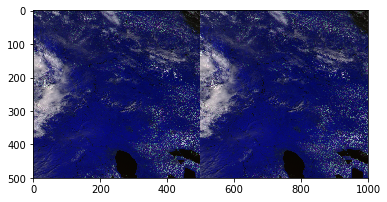

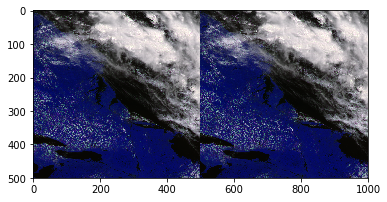

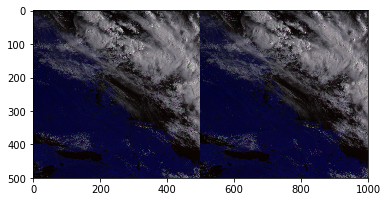

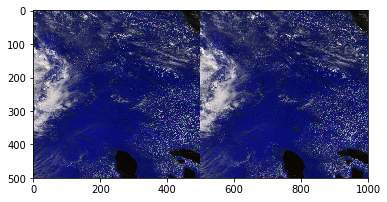

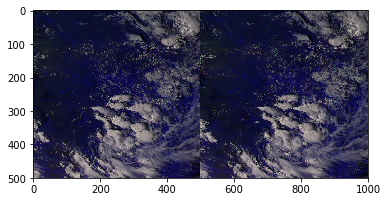

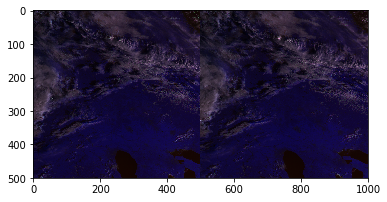

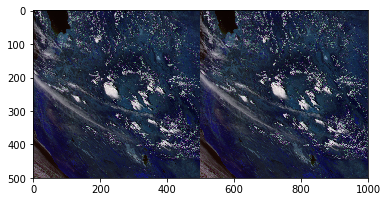

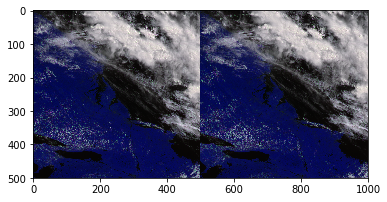

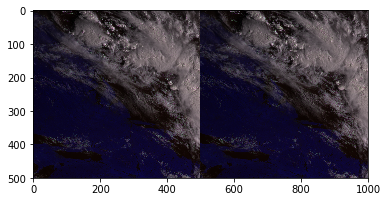

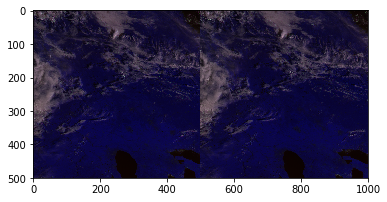

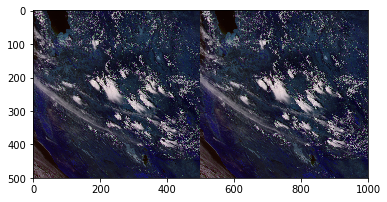

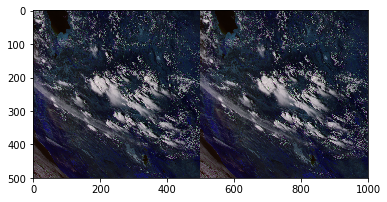

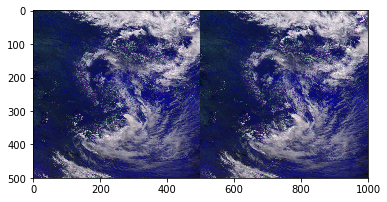

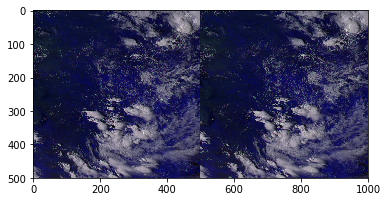

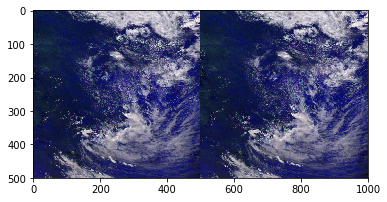

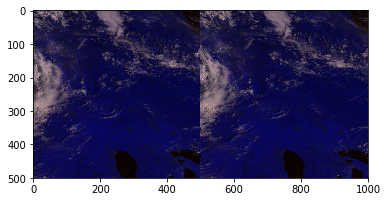

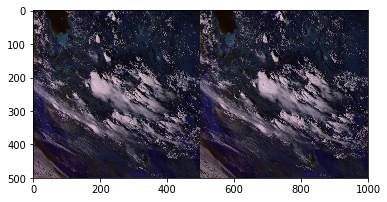

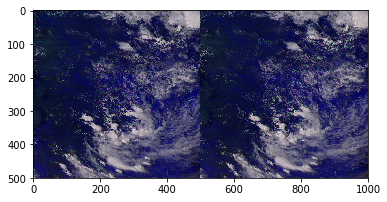

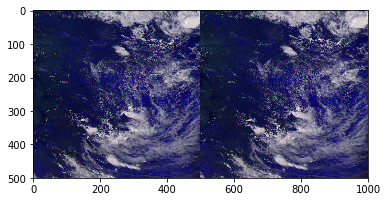

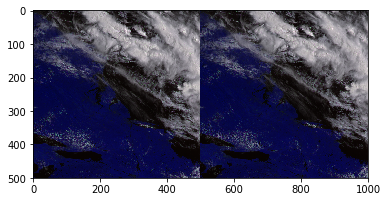

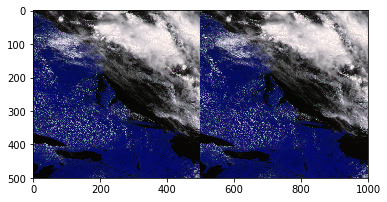

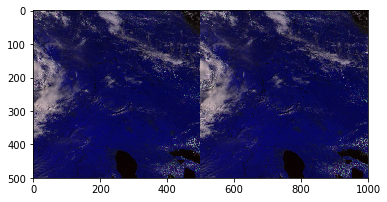

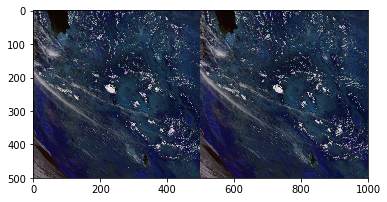

In [5]:
frame_counter = 0
for f in nc_files:
    ds = xr.open_dataset(f)
    for t in range(ds.t.shape[0]):
        obs = ds.observed.isel(t=t - t % 5).values.transpose(1,2,0)
        #pred1 = ds.sv_predicted.isel(t=t).values.transpose(1,2,0)
        pred2 = ds.mv_predicted.isel(t=t).values.transpose(1,2,0)

        img = np.concatenate([obs, pred2], axis=1)
        img[img > 1] = 1.
        img[img < 0] = 0.
        #plt.imsave('figures/movie-images/img-%03i.png' % frame_counter, img)
        frame_counter += 1
        plt.imshow(img)
        plt.show()
        break
        

In [11]:
cmd = 'ffmpeg -r 5 -i figures/movie-images/img-%03d.png -c:v libx264 -vf fps=25 -pix_fmt yuv420p figures/movie.mp4'
os.system(cmd)

0